# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель проекта**:
Проанализировать возможную прибыль и риски в трех регионах, с целью выбора локации новой скважины. 

**Условия задачи:** \
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).\
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.\
Бюджет на разработку скважин в регионе — 10 млрд рублей.\
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.\
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.\
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**План проекта**
 1. Загрузка и подготовка данных.
 2. Обучения и проверка модели.
 3. Подготовка к расчету прибыли.
 4. Расчет прибыли и рисков.
 5. Вывод
 6. Чек-лист готовности проекта. 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from numpy.random import RandomState

from sklearn.model_selection import train_test_split

# загружаем классы для подготовки данных
from sklearn.preprocessing import StandardScaler

# загружаем функцию для работы с метриками
from sklearn.metrics import mean_squared_error

# загружаем нужные модели
from sklearn.linear_model import LinearRegression

## Загрузка и подготовка данных

### Загрузка данных

In [2]:
#загрузим данные в соответствующие датафреймы
geo_data_0 = pd.read_csv('geo_data_0.csv')

In [3]:
#загрузим данные в соответствующие датафреймы
geo_data_1 = pd.read_csv('geo_data_1.csv')

In [4]:
#загрузим данные в соответствующие датафреймы
geo_data_2 = pd.read_csv('geo_data_2.csv')

In [5]:
#создадим функцию для отображения общей информации о датафрейме

def main_info(df):
    display(df.head())
    df.info()
    return

In [6]:
#выведем информацию о первом датасете
main_info(geo_data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Можно увидеть, что типы данных соответствуют ожидаемым, пропусков не обнаружено

In [7]:
# выведем инфо о втором датасете
main_info(geo_data_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Также видим, что типы данных соответствуют ожидаемым, пропусков не обнаружено

In [8]:
# выведем инфо о третьем датасете
main_info(geo_data_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Типы данных соответствуют ожидаемым, пропусков не обнаружено

### Проверка на дубликаты

In [9]:
# проверим данные на явные дубликаты
geo_data_0.duplicated().sum()

0

In [10]:
# проверим данные на неявные дубликаты
geo_data_0.duplicated(subset='id').sum()

10

In [11]:
# выведем неявные дубликаты 
geo_data_0[geo_data_0['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Так как неизвестно, что означают признаки точек f0-f2, то нет возможности сложить данные или вычислить среднее для сохранения данных, поэтому принято решение удалить все дубликаты

In [12]:
geo_data_0 = geo_data_0.drop_duplicates(keep=False)

In [13]:
# проверим данные второго датасета на явные дубликаты
geo_data_1.duplicated().sum()

0

In [14]:
# проверим данные на неявные дубликаты
geo_data_1.duplicated(subset='id').sum()

4

In [15]:
geo_data_1[geo_data_1['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [16]:
# удалим неявные дубликаты
geo_data_1 = geo_data_1.drop_duplicates(keep=False)

In [17]:
# проверим данные третьего датасета на явные дубликаты
geo_data_2.duplicated().sum()

0

In [18]:
# проверим данные третьего датасета на неявные дубликаты
geo_data_2.duplicated(subset='id').sum()

4

In [19]:
# выведем неявные дубликаты для анализа
geo_data_2[geo_data_2['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [20]:
# удалим неявные дубликаты
geo_data_2 = geo_data_2.drop_duplicates(keep=False)

### Исследовательский анализ 

In [21]:
# создадим список подписей для графиков
labels =[
    'Значения', 
    'Значения', 
    'Значения', 
   ' Объём запасов в скважине (тыс. баррелей)'
] 

In [22]:
#создадим функцию построения графиков распределения признаков
def graph_maker(df):
    i = 1
    fig, ax = plt.subplots()
    col_names = df.select_dtypes(include='number').columns.to_list()
    for col_name in col_names:
        ax = plt.subplot(2, 2, i)
        df[col_name].plot(kind='hist', ax=ax, figsize=(16, 14))
        ax.set_title(f'Диаграмма распределения, {col_name}')
        ax.set_ylabel('Количество значений')
        ax.set_xlabel(f'{labels[i-1]}')
        i +=1
    fig.tight_layout()  
    plt.show() 

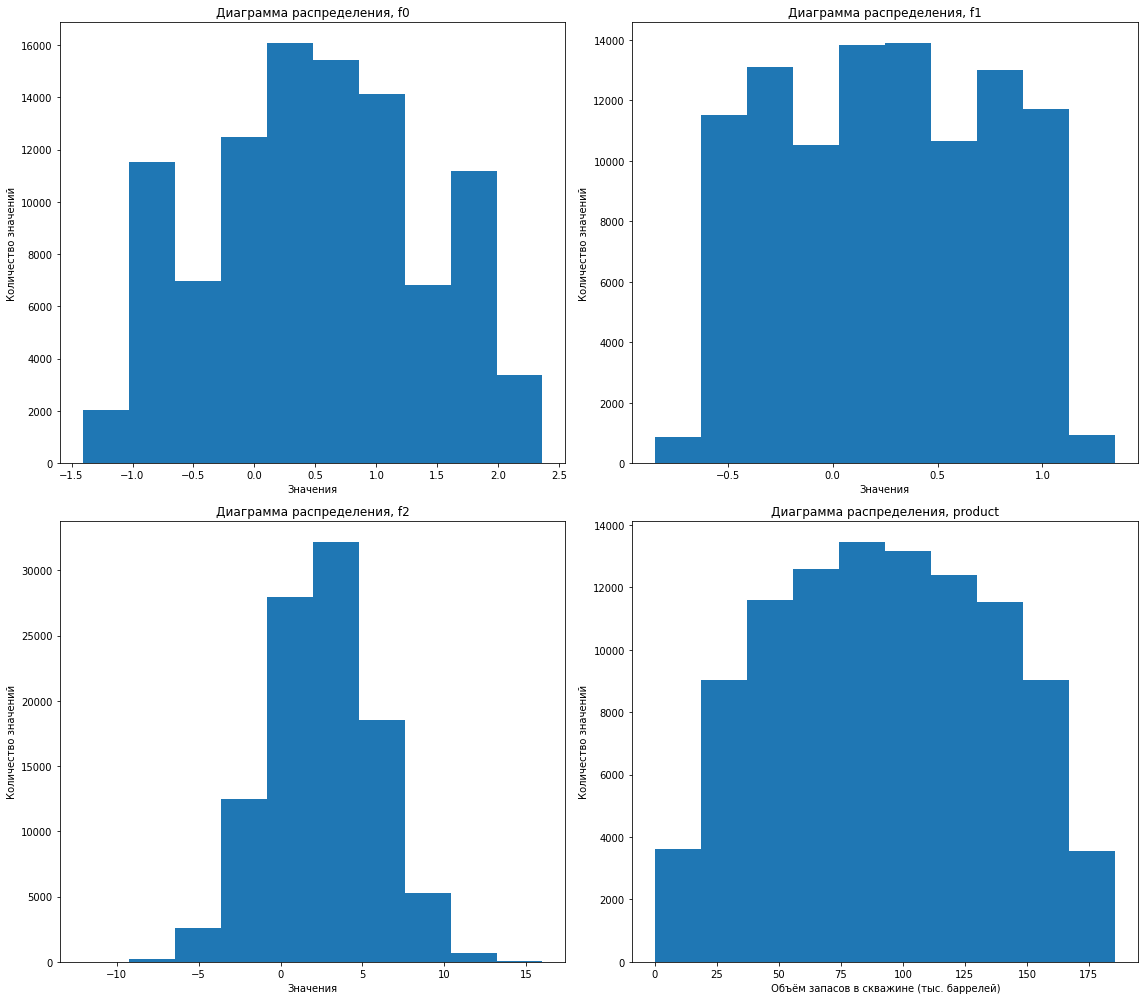

In [23]:
# построим графики распределения признаков в первом датасете
graph_maker(geo_data_0)

Распределения признаков похожи на нормальные, не наблюдаем выбросов в данных

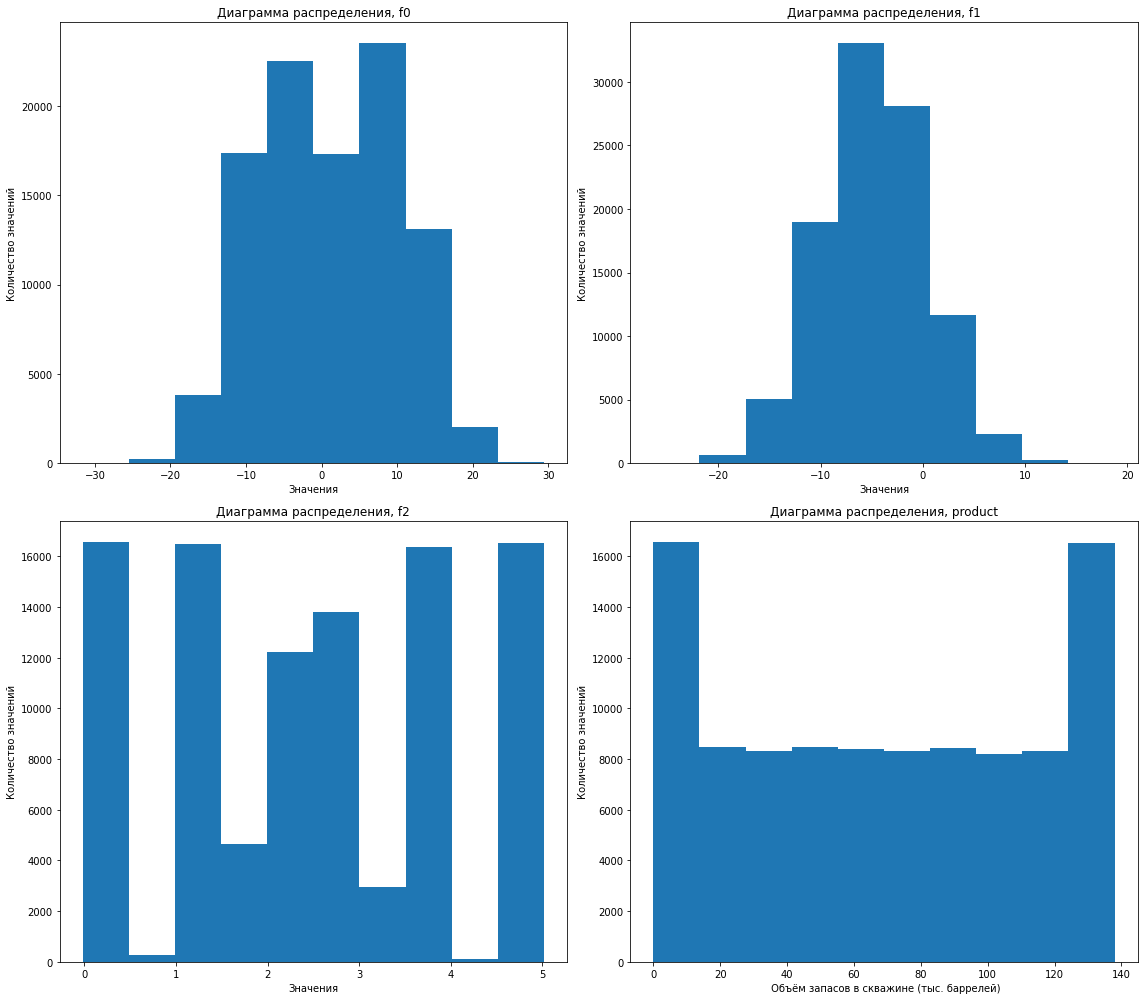

In [24]:
# построим графики распределения признаков во втором датасете
graph_maker(geo_data_1)

Распределения признаков f0 и f1 похожи на нормальные, не наблюдаем выбросов в данных. Признаки f2 и product распределены не нормально. 

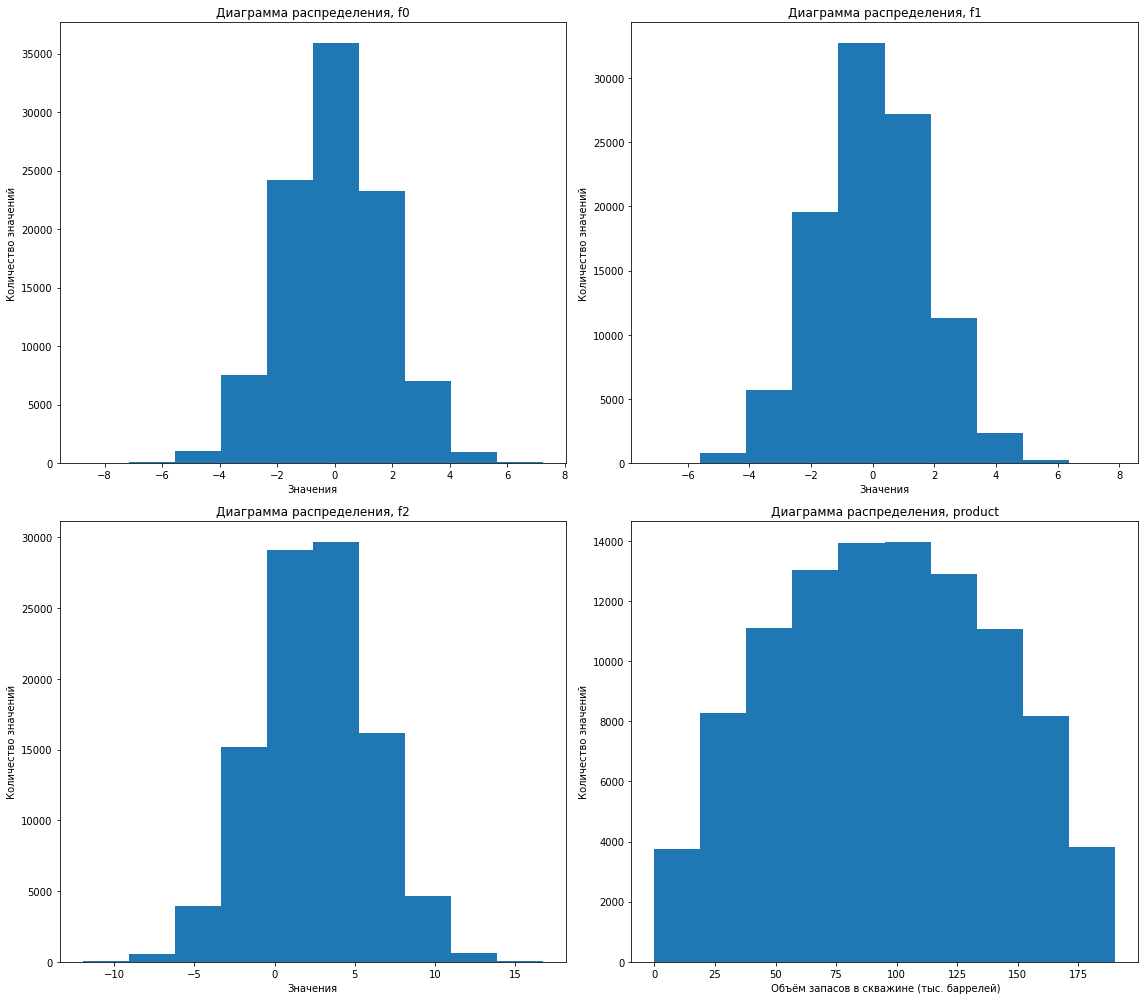

In [25]:
# построим графики распределения признаков в третьем датасете
graph_maker(geo_data_2)

Распределения признаков похожи на нормальные, не наблюдаем выбросов в данных

### Вывод

Произвели загрузку и обработку данных. В трех датасетах не были найдены пропуски, но присутствовали неявные дубликаты. Дубликаты удалены. Распределения признаков в 1 и 3 регионе похожи на нормальные, во 2 регионе есть аномальные распределения по признакам f2 и product. 

## Обучение и проверка модели

### Разбивка данных и обучение модели

In [26]:
# создадим функцию для предсказаний модели
def predictions(df):
    RANDOM_STATE = 42
    TEST_SIZE = 0.25

    X = df.drop(['product', 'id'], axis=1)
    y = df['product']

    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=TEST_SIZE,
        random_state=RANDOM_STATE
    )
    
    scaler=StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_valid_scaled)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    return rmse, y_pred, y_valid

In [27]:
# сохраним предсказания и правильные ответы на валидационной выборке для первого датасета
rmse_0, y_pred_0, y_valid_0 = predictions(geo_data_0)

In [28]:
# сохраним предсказания и правильные ответы на валидационной выборке для второго датасета
rmse_1, y_pred_1, y_valid_1 = predictions(geo_data_1)

In [29]:
# сохраним предсказания и правильные ответы на валидационной выборке для третьего датасета
rmse_2, y_pred_2, y_valid_2 = predictions(geo_data_2)

### Вывод показателей 

In [30]:
# выведем средний запас предсказанного сырья и RMSE модели по первому региону
print(f'Регион 1:')
print(f'RMSE LinearRegression  = {rmse_0:.3f}')
print(f'Средний запас предсказанного сырья  = {y_pred_0.mean():.3f}')

Регион 1:
RMSE LinearRegression  = 37.757
Средний запас предсказанного сырья  = 92.399


In [31]:
# выведем средний запас предсказанного сырья и RMSE модели по второму региону
print(f'Регион 2:')
print(f'RMSE LinearRegression  = {rmse_1:.3f}')
print(f'Средний запас предсказанного сырья  = {y_pred_1.mean():.3f}')

Регион 2:
RMSE LinearRegression  = 0.890
Средний запас предсказанного сырья  = 68.713


In [32]:
# выведем средний запас предсказанного сырья и RMSE модели по третьему региону
print(f'Регион 3:')
print(f'RMSE LinearRegression  = {rmse_2:.3f}')
print(f'Средний запас предсказанного сырья  = {y_pred_2.mean():.3f}')

Регион 3:
RMSE LinearRegression  = 40.146
Средний запас предсказанного сырья  = 94.771


### Вывод
Разбили данные на обучающую и валидационную выборки в соотношении 75:25. \
Обучили модель и сделали предсказания на валидационной выборке для трех регионов.\
Лучшие показатели по RMSE у второго региона - 0.890, но здесь же самый низкий показатель среднего запаса предсказанного сырья. \
Самый высокий средний запас предсказанного сырья у третьего региона, здесь же худший показатель по метрике RMSE - 40.146

## Подготовка к расчёту прибыли

In [33]:
# сохраним значения для расчетов в переменных
K_POINTS = 500
K_POINTS_BEST = 200
BUDGET = 10000000000
INCOME_PER_UNIT = 450000
LOSS_PROBA = 0.025

In [34]:
# расчитаем достаточный объем сырья для безубыточной разработки новой скважины
break_even_point = BUDGET / INCOME_PER_UNIT / K_POINTS_BEST

In [35]:
print(f'Достаточный объем сырья для безубыточной разработки новой скважины: {break_even_point:.2f} тыс. баррелей')

Достаточный объем сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


### Вывод

Сравнивая ранее рассчитанные средние запасы предсказанного сырья в трех регионах с достаточным объемом сырья, можем сказать, что во всех регионах средние запасы меньше безубыточных. 

## Расчёт прибыли и рисков 

In [36]:
# напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели

def profit(predictions, valid):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    points_best = valid.reset_index(drop=True)[predictions_sorted.index][:K_POINTS_BEST]
    profit_sum = points_best.sum() * INCOME_PER_UNIT - BUDGET
    return profit_sum

In [37]:
# напишем функцию для применения техники Bootstrap для определения распределения прибыли
def bootstrap(predictions, valid):
    values = []
    state = RandomState(12345)
    
    for i in range(1000):
        pred_sample = pd.Series(predictions).sample(n=K_POINTS, replace=True, random_state=state)
        values.append(profit(pred_sample, valid))
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_profit = values.mean()
    #loss_risk = len(values[values < 0])/len(values)
    loss_risk = (values < 0).mean()
    return lower, upper, mean_profit, loss_risk

In [38]:
# сохраним значения границ доверительного интервала, средней прибыли и риск убытков для первого региона
lower_0, upper_0, mean_profit_0, loss_risk_0 = bootstrap(y_pred_0, y_valid_0)

In [39]:
# сохраним значения границ доверительного интервала, средней прибыли и риск убытков для второго региона
lower_1, upper_1, mean_profit_1, loss_risk_1 = bootstrap(y_pred_1, y_valid_1)

In [40]:
# сохраним значения границ доверительного интервала, средней прибыли и риск убытков для третьего региона
lower_2, upper_2, mean_profit_2, loss_risk_2 = bootstrap(y_pred_2, y_valid_2)

In [41]:
print('Регион 1:')
print(f'Доверительный интервал: {lower_0:.2f} - {upper_0:.2f}')
print(f'Средняя прибыль:{mean_profit_0:.2f}')
print(f'Риск убытков:{loss_risk_0:.2%}')

print('\nРегион 2:')
print(f'Доверительный интервал: {lower_1:.2f} - {upper_1:.2f}')
print(f'Средняя прибыль: {mean_profit_1:.2f}')
print(f'Риск убытков: {loss_risk_1:.2%}')

print('\nРегион 3:')
print(f'Доверительный интервал: {lower_2:.2f} - {upper_2:.2f}')
print(f'Средняя прибыль: {mean_profit_2:.2f}')
print(f'Риск убытков: {loss_risk_2:.2%}')

Регион 1:
Доверительный интервал: -117742136.49 - 911737050.75
Средняя прибыль:406278783.42
Риск убытков:6.70%

Регион 2:
Доверительный интервал: 16846174.93 - 815972526.29
Средняя прибыль: 432624131.81
Риск убытков: 1.90%

Регион 3:
Доверительный интервал: -170780417.71 - 901772131.39
Средняя прибыль: 377362192.42
Риск убытков: 7.40%


### Вывод

По условиям задачи после оценки рисков требуется найти регионы, в которых вероятность убытков меньше 2.5% - единственный подходящий регион 2, с показателем риска убытков 1.90%. Данный регион также показывает наибольшую среднюю прибыль среди регионов - 432624131.81

Поэтому для выбора локации новой скважины необходимо выбрать второй регион. 

## Вывод

В начале проекта была поставлена задача: проанализировать возможную прибыль и риски в трех регионах, с целью выбора локации новой скважины.

В ходе проекта были произведены следующие шаги:

**1. Загрузка и обработка данных.** \
В трех датасетах не были найдены пропуски, но присутствовали неявные дубликаты. Дубликаты удалены. Распределения признаков в 1 и 3 регионе похожи на нормальные, во 2 регионе есть аномальные распределения по признакам f2 и product.

**2. Обучение и проверка модели**\
Разбили данные на обучающую и валидационную выборки в соотношении 75:25.
Обучили модель и сделали предсказания на валидационной выборке для трех регионов.

- Регион 1:\
RMSE LinearRegression  = 37.757\
Средний запас предсказанного сырья  = 92.399

- Регион 2:\
RMSE LinearRegression  = 0.890\
Средний запас предсказанного сырья  = 68.713

- Регион 3:\
RMSE LinearRegression  = 40.146\
Средний запас предсказанного сырья  = 94.771

Лучшие показатели по RMSE у второго региона - 0.890, но здесь же самый низкий показатель среднего запаса предсказанного сырья.
Самый высокий средний запас предсказанного сырья у третьего региона, здесь же худший показатель по метрике RMSE - 40.146

**3. Подготовка к расчету прибыли**\
Все ключевые значения для расчётов сохранили в отдельных переменных.
Далее рассчитали достаточный объём сырья для безубыточной разработки новой скважины, равный 111.11 тыс баррелей. 
Сравнивая ранее рассчитанные средние запасы предсказанного сырья в трех регионах с достаточным объемом сырья, можем сказать, что во всех регионах средние запасы меньше безубыточных.

**4. Расчет прибыли и рисков**\
Были написаны две функции - для расчета прибыли и для применения техники Bootstrap

Получили следующие показатели по 95% доверительному интервалу, средней прибыли и риску отрицательной прибыли: 

- Регион 1:\
Доверительный интервал: -117742136.49 - 911737050.75\
Средняя прибыль: 406278783.42\
Риск убытков: 6.70%

- Регион 2:\
Доверительный интервал: 16846174.93 - 815972526.29\
Средняя прибыль: 432624131.81\
Риск убытков: 1.90%

- Регион 3:\
Доверительный интервал: -170780417.71 - 901772131.39\
Средняя прибыль: 377362192.42\
Риск убытков: 7.40%

По условиям задачи после оценки рисков требуется найти регионы, в которых вероятность убытков меньше 2.5% - единственный подходящий регион 2, с показателем риска убытков 1.90%. Данный регион также показывает наибольшую среднюю прибыль среди регионов - 432624131.81

Поэтому для выбора локации новой скважины необходимо выбрать второй регион.